In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import vstack,array
from numpy.random import rand
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Jitesh Chandani/Desktop/data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [4]:
df.dtypes

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

# Exercise 1

There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [5]:
df.drop(["DATE", "SP500"], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler 
features = df.values 
sc = StandardScaler() 
X_scaled = sc.fit_transform(features) 
print('Shape of Scaled features : ') 
print(X_scaled.shape)

Shape of Scaled features : 
(41266, 500)


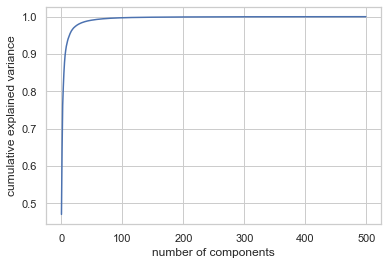

In [7]:
# Determining optimal number of components for PCA looking at the explained variance as a function of the components
sns.set() 
sns.set_style('whitegrid') 
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance') 
plt.show()

In [8]:
# Here we see that we'd need about 100 components to retain 100% of the variance. Looking at this plot for a high-dimensional 
# dataset can help us understand the level of redundancy present in multiple observatio ns
# Applying PCA to reduce the number of dimensions from 502 to 2 dimensions for better d ata visualization. 
pca = PCA(n_components=2) 
pca.fit(X_scaled) 
print('explained variance :') 
print('************************************************************') 
print(pca.explained_variance_) 
print('************************************************************') 
print('PCA Components : ') 
print('************************************************************')
print(pca.components_) 
print('************************************************************') 
X_transformed = pca.transform(X_scaled) 
print('Transformed Feature values first five rows :') 
print('************************************************************') 
print(X_transformed[:5,:]) 
print('************************************************************') 
print('Transformed Feature shape :') 
print('************************************************************') 
print(X_transformed.shape) 
print('************************************************************') 
print('Original Feature shape :') 
print('************************************************************') 
print(X_scaled.shape) 
print('************************************************************') 
print('Restransformed Feature shape :') 
print('************************************************************') 
X_retransformed = pca.inverse_transform(X_transformed) 
print(X_retransformed.shape)
print('************************************************************') 
print('Retransformed Feature values first five rows :') 
print('************************************************************') 
print(X_retransformed[:5,:]) 
print('************************************************************')


explained variance :
************************************************************
[235.15857127  86.16396277]
************************************************************
PCA Components : 
************************************************************
[[-0.03925756 -0.04106421 -0.0629084  -0.00978759 -0.03586574 -0.05466784
   0.05035595 -0.03539554 -0.04405989 -0.01467085 -0.04584359 -0.04662171
  -0.06222525 -0.05803802  0.06133018 -0.03652043 -0.02313099 -0.06308071
  -0.04272566 -0.03743331  0.05052145 -0.0481468  -0.0502328  -0.04129622
  -0.05166053  0.04501948  0.04493425 -0.01594781 -0.05427409 -0.06234338
   0.0503649   0.05412417  0.0553185   0.0147627   0.03491696 -0.05851211
  -0.0466687  -0.0576979   0.02351488 -0.05959721 -0.02458482 -0.05492053
   0.05005135 -0.05956379  0.05549381 -0.05149528 -0.04974669 -0.02670091
   0.04359891  0.04241403 -0.04817542 -0.03865677 -0.03657459 -0.02771201
   0.03561484 -0.02026983 -0.01418489  0.02481032 -0.02028702  0.00624182
  -0.03048

(41266, 500)
************************************************************
Retransformed Feature values first five rows :
************************************************************
[[-1.64624642 -0.71039148 -1.5886974  ... -1.80047153 -0.74791024
  -1.91623856]
 [-1.64285543 -0.71826683 -1.59511178 ... -1.80432758 -0.7384828
  -1.91461479]
 [-1.63516658 -0.71704758 -1.58986864 ... -1.79761844 -0.73321725
  -1.90618707]
 [-1.65016232 -0.7156411  -1.59616896 ... -1.80763791 -0.74668286
  -1.92168234]
 [-1.63924382 -0.71595834 -1.59084847 ... -1.7997701  -0.7374754
  -1.91022427]]
************************************************************


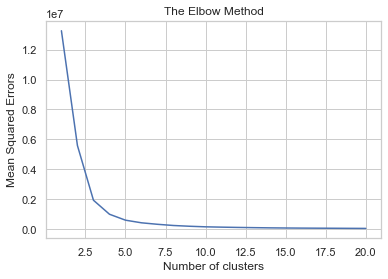

In [9]:
# Finding optimum number of clusters for KMEANS cluster 
wcss=[] 
for i in range(1, 21): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    kmeans.fit(X_transformed) 
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 21), wcss) 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Mean Squared Errors') 
plt.show()

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

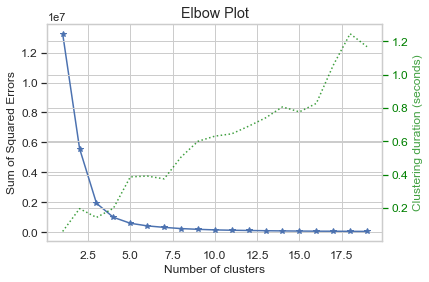

In [10]:
import scikitplot 
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

In [11]:
#optimum number of cluster which are determined from elbow method is 5.
# Applying K-Means Clustering to find stocks which are similar in performance 
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++') 
k_means.fit(X_transformed) 
y_kmeans = kmeans.fit_predict(X_transformed) 
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [1 1 1 ... 2 2 2]


In [12]:
len(labels)

41266

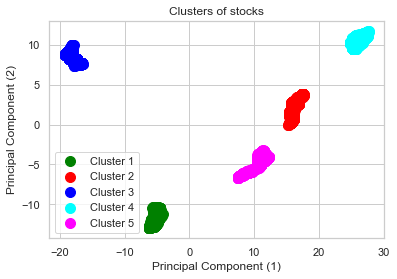

The above 5 clusters shows the stocks which are similar in stock performance


In [13]:
# Visualising the clusters 
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1') 
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2') 
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of stocks') 
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)') 
plt.legend() 
plt.show() 
print('The above 5 clusters shows the stocks which are similar in stock performance')

# Exercise 2

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [14]:
# Find the average annual percentage returns for each stock (column)
returns = pd.DataFrame()
returns["Return"] = df.pct_change().mean()*252
returns["Volatility"] = df.pct_change().std()*sqrt(252)
returns

,Return,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048
...,...,...
NYSE.XRX,0.018951,0.234735
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [15]:
import warnings
warnings.filterwarnings('ignore')

returns["Volatility"] = df.pct_change().std()*sqrt(252)
returns

,Return,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048
...,...,...
NYSE.XRX,0.018951,0.234735
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [16]:
# Convert Dataframe to Numpy Array
X = returns

inertia= []
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    inertia.append(k_means.inertia_)   # inertia shows how far the points are within a cluster

In [17]:
# When the number of clusters increases, inertia decreases.
inertia


[0.009179624025701771,
 0.003828026610359753,
 0.0023141597403154475,
 0.001594701888951982,
 0.0011816826860351114,
 0.0009449628910977424,
 0.0007999911034448721,
 0.0006694795004194723,
 0.000588592192625678,
 0.0005228217987058011,
 0.0004669425350265877,
 0.0004315655389403667,
 0.00039354371208723786,
 0.00035751257972121834,
 0.0003369230443603133,
 0.00030492003243539473,
 0.00028957971768910854,
 0.0002658761931217795]

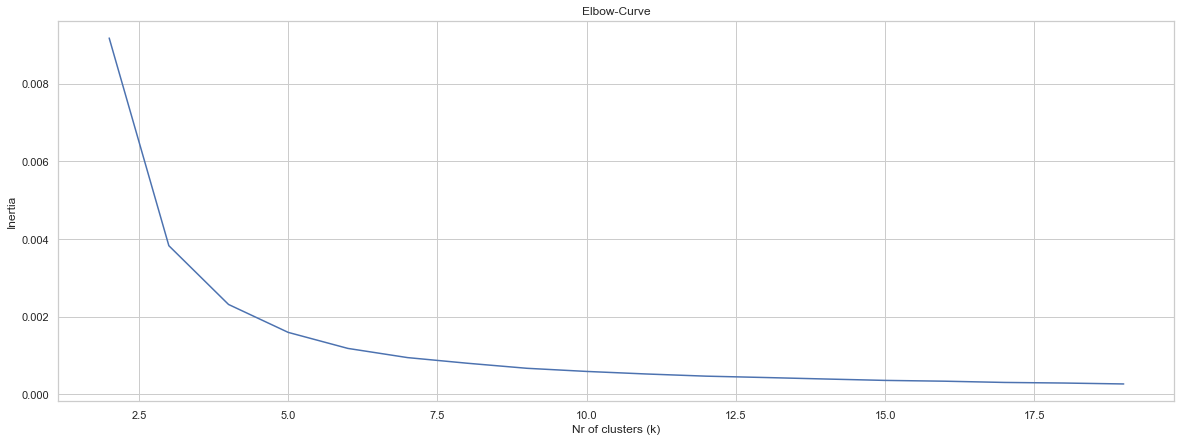

In [18]:
# Elbow method to find the best value of number of clusters
fig = plt.figure(figsize=(20,7))
plt.plot(range(2,20), inertia)
plt.grid(True)
plt.title('Elbow-Curve')
plt.xlabel("Nr of clusters (k)")
plt.ylabel("Inertia")
plt.show()

# At cluster no.5 or 4 the curve has a steep , so we choose 5 as the number of clusters
# When number of clusters is greater than 5, inertia decreases very slowly

In [19]:
# Fitting K-Means to the dataset
nr_clusters = 5
kmeans = KMeans(n_clusters = nr_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
#print(kmeans.labels_)

[0 2 2 2 2 0 0 0 0 4 3 2 2 2 0 2 0 3 2 2 2 0 2 2 3 2 2 2 2 3 2 0 0 2 0 0 2
 2 0 2 2 2 0 2 0 3 2 2 2 2 3 3 2 2 0 2 0 2 2 2 0 4 3 3 2 2 2 3 2 2 0 2 0 2
 3 2 3 0 0 0 3 0 2 2 4 4 2 0 3 2 2 2 0 2 3 0 0 0 2 0 3 0 2 4 2 2 0 2 0 3 0
 0 3 3 4 3 0 4 2 0 2 2 0 2 4 3 2 3 3 2 0 3 3 2 3 3 3 3 3 2 3 2 2 3 3 3 2 2
 3 0 2 3 0 0 3 3 3 0 3 3 3 3 0 0 3 2 3 2 0 0 3 2 2 4 3 3 4 2 3 3 0 2 2 2 0
 2 3 2 2 3 3 0 0 3 4 3 3 3 2 0 2 3 2 3 2 0 0 2 2 2 0 2 2 2 0 3 3 0 3 2 3 2
 2 0 3 2 3 3 2 2 2 3 3 2 3 3 2 0 2 3 3 2 3 2 2 3 2 3 0 3 2 2 3 0 2 3 2 2 3
 0 3 3 3 4 0 0 2 2 0 3 3 2 0 3 2 2 2 2 0 2 0 2 2 2 3 2 3 0 3 0 3 0 2 2 0 2
 3 2 3 2 3 3 2 3 0 3 2 2 3 2 2 2 3 2 3 4 3 0 0 3 2 0 3 4 0 0 2 3 4 3 2 2 2
 3 3 2 3 2 2 2 3 2 0 3 3 2 3 3 2 3 3 2 2 2 0 3 3 0 2 3 0 2 3 0 2 3 2 0 0 3
 2 0 3 2 2 3 0 4 2 0 2 3 2 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 2 2 3 3 3 0 2 2 3
 0 2 3 0 3 2 2 0 2 2 4 2 0 2 3 0 3 3 2 2 2 2 4 2 2 2 2 3 2 3 3 2 2 2 3 0 3
 3 3 2 0 2 0 2 2 3 3 3 2 2 2 3 2 0 0 2 3 2 3 2 3 3 0 3 3 3 3 2 2 0 0 3 3 2
 3 2 2 3 2 3 2 2 3 2 0 3 

In [20]:
kmeans.cluster_centers_


array([[-4.42070482e-04,  1.57131328e-02],
       [ 1.89505434e-02,  2.34735167e-01],
       [ 2.34434109e-04,  1.09177375e-02],
       [ 4.00372629e-04,  7.60502953e-03],
       [-4.74829190e-04,  2.45881459e-02]])

In [21]:
X[y_kmeans == 3]

,Return,Volatility
NASDAQ.AMGN,0.000509,0.008783
NASDAQ.CBOE,0.001373,0.008338
NASDAQ.CME,0.000353,0.008203
NASDAQ.CTSH,0.001067,0.007803
NASDAQ.FISV,0.000449,0.007682
...,...,...
NYSE.XEL,0.000679,0.005749
NYSE.XL,0.000195,0.008365
NYSE.XOM,-0.000420,0.006454
NYSE.YUM,0.001151,0.006875


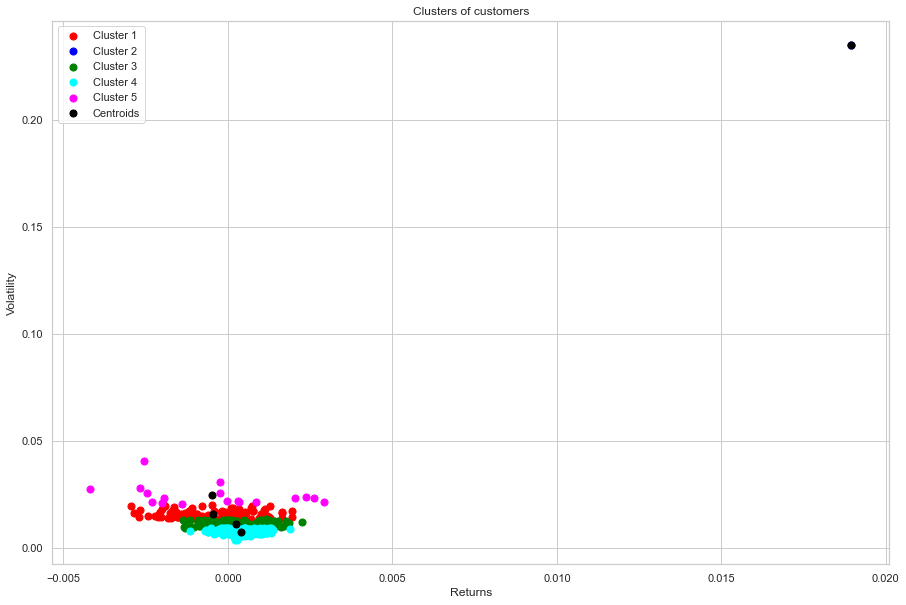

In [22]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0]['Return'], X[y_kmeans == 0]['Volatility'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Return'], X[y_kmeans == 1]['Volatility'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Return'], X[y_kmeans == 2]['Volatility'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Return'], X[y_kmeans == 3]['Volatility'], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Return'], X[y_kmeans == 4]['Volatility'], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [23]:
# We should find the outlier and delete it. 
# Since it is a point that is far from all the other points it should not be part of any cluster
# idxmax returns the index of the maximum element in each column (axis=0 by default)
# As we see the row with index NYSE.XRX is the outlier

print(returns.idxmax())

Return        NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [24]:
# drop the NYSES.XRX stock from our data
new_df = df.drop('NYSE.XRX',axis=1).copy()

returns = pd.DataFrame()
returns["Return"] = new_df.pct_change().mean()*252
returns["Volatility"] = new_df.pct_change().std()*sqrt(252)
returns
# nr of rows is 499 since we dropped one column

,Return,Volatility
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
NASDAQ.ADP,0.000310,0.011048
...,...,...
NYSE.XOM,-0.000420,0.006454
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [25]:
# Fitting K-Means to the dataset
X = returns
nr_clusters = 5
kmeans = KMeans(n_clusters = nr_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
#print(kmeans.labels_)

[4 1 1 4 1 0 0 0 4 2 1 1 4 4 4 4 4 3 1 1 4 4 1 1 3 1 1 1 1 3 4 4 4 4 0 4 1
 1 4 4 1 1 4 1 4 3 4 1 4 4 1 1 1 1 0 4 4 4 1 4 4 0 3 1 4 1 1 3 4 1 4 1 4 4
 3 1 3 0 0 4 3 4 4 1 0 0 4 0 3 1 1 1 4 1 1 4 0 4 1 0 1 0 4 2 4 4 0 1 4 1 0
 0 1 1 2 1 0 2 1 4 4 1 4 1 0 3 4 3 3 1 4 3 3 4 3 3 1 3 1 1 3 1 4 3 1 3 4 1
 1 4 1 3 4 4 3 3 1 0 1 3 3 3 0 0 3 4 3 1 0 0 1 1 4 2 3 1 2 1 3 3 4 1 1 1 4
 1 3 1 1 1 3 0 4 3 2 3 3 3 4 4 1 3 4 3 4 4 4 1 1 4 0 1 1 1 4 3 3 4 3 4 3 1
 1 4 3 1 3 3 4 1 1 3 3 1 3 3 1 0 1 3 3 1 3 1 1 1 4 3 0 3 1 1 3 4 4 3 1 1 3
 0 3 1 3 2 4 0 4 1 4 1 3 1 4 3 1 1 1 1 0 1 0 4 4 1 3 1 3 0 3 4 3 0 1 4 4 1
 3 4 3 1 3 1 1 1 4 1 1 1 3 1 1 4 3 1 1 0 3 4 4 3 1 0 3 0 0 0 1 3 0 1 1 1 1
 1 3 4 3 1 1 4 1 1 0 3 1 4 1 3 4 1 3 4 1 1 4 3 3 0 1 3 4 1 3 0 4 1 1 0 4 3
 4 0 3 1 1 3 4 2 1 4 4 1 4 1 1 1 3 3 3 3 1 3 3 1 1 1 3 3 1 1 3 3 3 0 1 1 3
 4 4 1 0 3 4 1 4 1 4 0 4 0 1 3 0 3 3 1 1 1 1 2 1 1 1 1 3 4 3 3 1 1 1 3 0 3
 3 3 1 4 1 4 4 1 3 3 3 1 1 1 3 1 0 0 4 3 4 3 1 1 3 0 3 3 3 1 1 1 4 0 3 3 1
 3 1 4 3 1 1 1 1 1 1 0 3 

In [26]:
kmeans.cluster_centers_


array([[-0.00045963,  0.01796525],
       [ 0.00028132,  0.01003419],
       [-0.00072391,  0.02715909],
       [ 0.00042175,  0.00721429],
       [-0.00010964,  0.013313  ]])

In [27]:
len(y_kmeans)

499

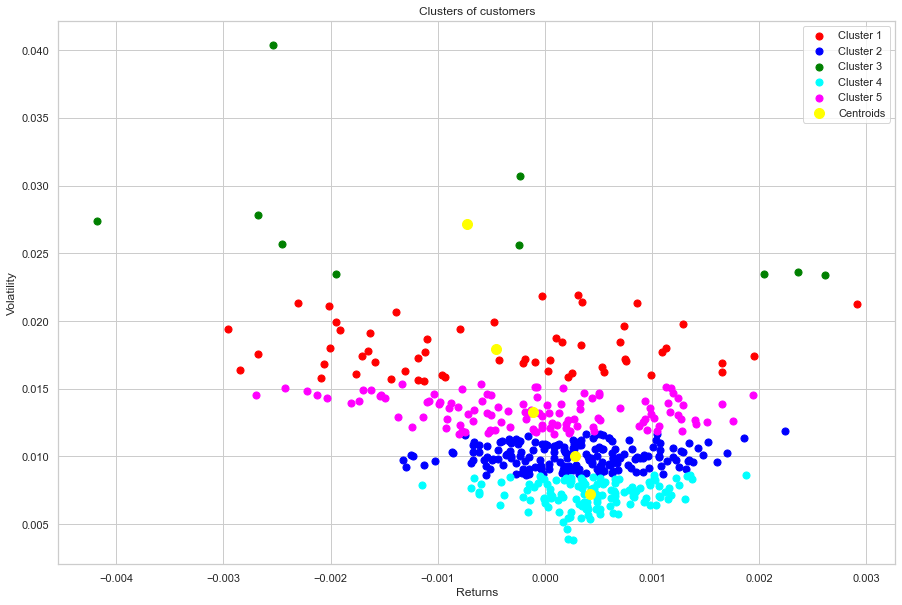

In [28]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0]['Return'], X[y_kmeans == 0]['Volatility'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Return'], X[y_kmeans == 1]['Volatility'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Return'], X[y_kmeans == 2]['Volatility'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Return'], X[y_kmeans == 3]['Volatility'], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Return'], X[y_kmeans == 4]['Volatility'], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [29]:
data = [(stock, cluster) for stock, cluster in zip(returns.index, y_kmeans)]
data[:10]

[('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 1),
 ('NASDAQ.ADBE', 1),
 ('NASDAQ.ADI', 4),
 ('NASDAQ.ADP', 1),
 ('NASDAQ.ADSK', 0),
 ('NASDAQ.AKAM', 0),
 ('NASDAQ.ALXN', 0),
 ('NASDAQ.AMAT', 4),
 ('NASDAQ.AMD', 2)]

In [30]:
datafr = pd.DataFrame(data, columns=["Stock", "Cluster"])
datafr

,Stock,Cluster
0,NASDAQ.AAL,4
1,NASDAQ.AAPL,1
2,NASDAQ.ADBE,1
3,NASDAQ.ADI,4
4,NASDAQ.ADP,1
...,...,...
494,NYSE.XOM,3
495,NYSE.XYL,1
496,NYSE.YUM,3
497,NYSE.ZBH,1


In [31]:
datafr["Cluster"].value_counts()

1    187
3    130
4    116
0     56
2     10
Name: Cluster, dtype: int64

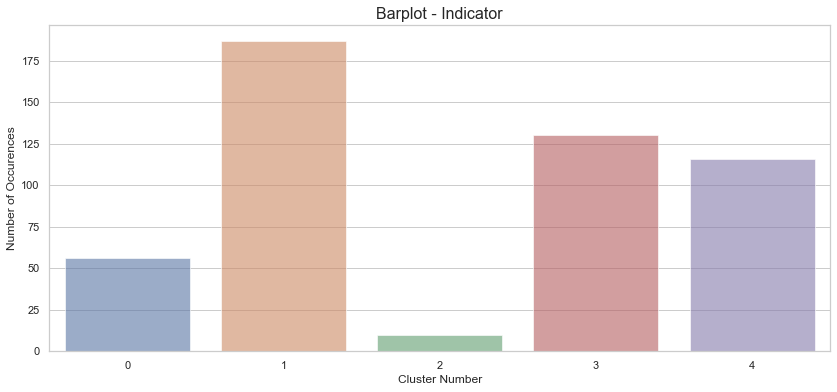

In [32]:
import seaborn as sns
clusters = datafr["Cluster"].value_counts()
plt.figure(figsize=(14,6))
sns.barplot(x=clusters.index, y=clusters.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

# Exercise 3

Identify which all stocks are moving together and which all stocks are different from each other

In [33]:
df['labels'] = labels


In [34]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,1
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,1
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,1
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,1
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,1


In [35]:
df['labels'].unique().tolist()

[1, 3, 4, 0, 2]

In [36]:
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i, count))


For lablel 1 the number of similar stock performances is : 5875 

For lablel 3 the number of similar stock performances is : 8623 

For lablel 4 the number of similar stock performances is : 11153 

For lablel 0 the number of similar stock performances is : 5877 

For lablel 2 the number of similar stock performances is : 9738 


In [37]:
#fitting hierarchical clustering to dataset
from sklearn.cluster import SpectralClustering
h_clustering = SpectralClustering(n_clusters =5, affinity = 'nearest_neighbors')
h_clustering.fit(X_transformed)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=5,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=None)

In [38]:
h_clustering.fit_predict(X_transformed)

array([2, 2, 2, ..., 1, 1, 1])

In [39]:
y_labels = h_clustering.labels_

In [40]:
len(y_labels),np.unique(y_labels)

(41266, array([0, 1, 2, 3, 4]))

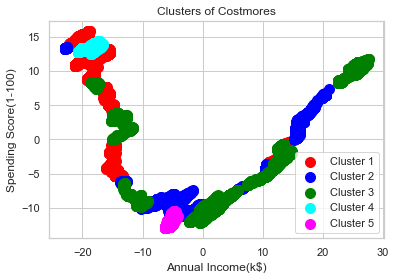

In [41]:
#visuallising the clusters
X=X_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') 
plt.title('Clusters of Costmores') 
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)') 
plt.legend() 
plt.show()

In [42]:
df['labels'] = y_labels
for i in df['labels'].unique().tolist():
    count = df[df['labels']==i].shape[0]
    print('\n for label {} the number of simillar stock performamnce is:{}'.format(i,count))


 for label 2 the number of simillar stock performamnce is:19150

 for label 1 the number of simillar stock performamnce is:9336

 for label 0 the number of simillar stock performamnce is:9212

 for label 4 the number of simillar stock performamnce is:2577

 for label 3 the number of simillar stock performamnce is:991
